# GBA 6070 - Programming Foundation for Business Analytics
# Dr. Mohammad Salehan
# Final Exam
Enter your name below.

In this exam you will work with the weather dataset. Let's start with loading the dataset.

In [213]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
weather = pd.read_csv('weather2.csv')

We also use another dataset that contains information about each weather station.

In [214]:
stations = pd.read_excel('Station Information.xlsx')

1. Examine the shape of the both dataframes (1 points).

In [215]:
print(weather.shape)
print(stations.shape)

(100000, 14)
(29745, 10)


2. Check the top 5 rows of each dataframe to see what they look like (1 points).

In [216]:
weather.head()

,Unnamed: 0,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h
0,0,841170-99999,2010.0,1.0,15.0,16.0,270.0,210.0,-9999.0,300.0,51.0,7.0,-9999.0,-9999.0
1,1,841170-99999,2010.0,1.0,15.0,17.0,270.0,210.0,-9999.0,310.0,57.0,7.0,-9999.0,-9999.0
2,2,841170-99999,2010.0,1.0,15.0,18.0,276.0,208.0,10115.0,310.0,51.0,7.0,-9999.0,-9999.0
3,3,841170-99999,2010.0,1.0,15.0,19.0,280.0,220.0,-9999.0,320.0,62.0,7.0,-9999.0,-9999.0
4,4,841170-99999,2010.0,1.0,15.0,20.0,280.0,220.0,-9999.0,300.0,72.0,7.0,-9999.0,-9999.0


In [217]:
stations.head()

,USAF,WBAN,STATION NAME,CTRY,ST CALL,LAT,LON,ELEV(M),BEGIN,END
0,7018,99999,WXPOD 7018,NaN,NaN,0.00,0.000,7018.0,20110309,20130730
1,7026,99999,WXPOD 7026,AF,NaN,0.00,0.000,7026.0,20120713,20170822
2,7070,99999,WXPOD 7070,AF,NaN,0.00,0.000,7070.0,20140923,20150926
3,8260,99999,WXPOD8270,NaN,NaN,0.00,0.000,0.0,20050101,20100920
4,8268,99999,WXPOD8278,AF,NaN,32.95,65.567,1156.7,20100519,20120323


3. Drop the first column (Unnamed) from weather, then display the top row (1 points).

In [218]:
weather.drop(weather.columns[0],axis=1,inplace=True)
weather.head(1)

,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h
0,841170-99999,2010.0,1.0,15.0,16.0,270.0,210.0,-9999.0,300.0,51.0,7.0,-9999.0,-9999.0


4. Combine ``USAF`` and ``WBAN`` columns of ``stations`` ``DataFrame`` to create a new column named ``station_wban`` that looks like the one in ``weather`` ``DataFrame`` (``USAF_WBAN``) (1 points).

In [219]:
stations['station_wban']=stations['USAF'].astype(str)+'-'+stations['WBAN'].astype(str)
stations.head(1)

,USAF,WBAN,STATION NAME,CTRY,ST CALL,LAT,LON,ELEV(M),BEGIN,END,station_wban
0,7018,99999,WXPOD 7018,NaN,NaN,0.0,0.0,7018.0,20110309,20130730,7018-99999


5. Join the 2 ``DataFrame``s to add ``station name``, country (``CTRY``) and state (``ST CALL``) to weather ``DataFrame``. There is no need for the rest of the columns in stations. You should use the proper type of join so that the number of rows in ``weather`` ``DataFrame`` stays the same. At the end of this part, the shape of ``weather`` should be (100000, 16). Check the first row of the result to make sure all values are correct  (1 points).

In [220]:
weather=pd.merge(weather,stations,on='station_wban',how='left').drop(['USAF','WBAN','LAT','LON','ELEV(M)','BEGIN','END'],axis=1)
weather.shape

(100000, 16)

6. Show descriptive statistics for all numeric columns of ``weather`` ``DataFrame`` (1 points).

In [221]:
weather.describe()

,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000
mean,2009.34663,6.751760,15.871240,11.483780,136.975390,81.14740,5797.130830,23.626870,33.54303,-1839.430760,-4556.22822,-9511.991990
std,5.49655,3.392016,8.831961,6.926196,361.774103,362.78918,8303.764083,1264.655425,110.06946,3878.528361,4980.57331,2154.103991
min,1999.00000,1.000000,1.000000,0.000000,-9999.000000,-9999.00000,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9999.00000,-9999.000000
25%,2005.00000,4.000000,8.000000,5.000000,61.000000,13.00000,10037.000000,70.000000,20.00000,0.000000,-9999.00000,-9999.000000
50%,2009.00000,7.000000,16.000000,11.000000,156.000000,99.00000,10140.000000,180.000000,31.00000,2.000000,-1.00000,-9999.000000
75%,2015.00000,10.000000,24.000000,17.000000,239.000000,178.00000,10189.000000,270.000000,46.00000,7.000000,0.00000,-9999.000000
max,2019.00000,12.000000,31.000000,23.000000,9999.000000,9999.00000,10449.000000,999.000000,999.00000,9.000000,2794.00000,1278.000000


7. In all numeric columns, values 9999, -9999, 999, and -999 represent missing values. Replace all of them with np.nan using <a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html' target='blank'>.replace() </a> method of ``DataFrame`` (1 points).

In [222]:
weather.replace([9999, -9999, 999, -999],np.nan,inplace=True)

8. Run descriptive statistics again to make sure the the values are transformed correctly (1 points).

In [223]:
weather.describe()

,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h
count,100000.00000,100000.000000,100000.000000,100000.000000,99711.000000,99698.000000,78317.000000,97501.000000,99937.000000,81570.000000,54426.000000,4863.000000
mean,2009.34663,6.751760,15.871240,11.483780,144.152882,87.462597,10162.052505,173.352971,34.144951,4.149736,1.315621,15.559120
std,5.49655,3.392016,8.831961,6.926196,110.650054,108.562320,71.561724,112.883343,23.637969,3.341461,18.754512,50.480649
min,1999.00000,1.000000,1.000000,0.000000,-289.000000,-333.000000,9833.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,2005.00000,4.000000,8.000000,5.000000,61.000000,14.000000,10121.000000,70.000000,20.000000,0.000000,0.000000,0.000000
50%,2009.00000,7.000000,16.000000,11.000000,156.000000,99.000000,10159.000000,180.000000,31.000000,4.000000,0.000000,0.000000
75%,2015.00000,10.000000,24.000000,17.000000,239.000000,178.000000,10204.000000,270.000000,46.000000,8.000000,0.000000,8.000000
max,2019.00000,12.000000,31.000000,23.000000,420.000000,280.000000,10449.000000,360.000000,175.000000,9.000000,2794.000000,1278.000000


9. All weather meaures are inflated with a factor of 10. For example, 289 for ``temperature`` means 28.9 degrees. Divide all measures by 10. Use ``.apply()`` method and a ``lambda function``. Other columns, such as day and hour should not be affected (1 points).

In [224]:
weather['temperature']=weather['temperature'].apply(lambda x:x/10)
weather['dew_point']=weather['dew_point'].apply(lambda x:x/10)
weather['pressure']=weather['pressure'].apply(lambda x:x/10)
weather['wind_direction']=weather['wind_direction'].apply(lambda x:x/10)
weather['wind_speed']=weather['wind_speed'].apply(lambda x:x/10)
weather['precipitation_1h']=weather['precipitation_1h'].apply(lambda x:x/10)
weather['precipitation_6h']=weather['precipitation_6h'].apply(lambda x:x/10)
weather.describe()

,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h
count,100000.00000,100000.000000,100000.000000,100000.000000,99711.000000,99698.000000,78317.000000,97501.000000,99937.000000,81570.000000,54426.000000,4863.000000
mean,2009.34663,6.751760,15.871240,11.483780,14.415288,8.746260,1016.205250,17.335297,3.414495,4.149736,0.131562,1.555912
std,5.49655,3.392016,8.831961,6.926196,11.065005,10.856232,7.156172,11.288334,2.363797,3.341461,1.875451,5.048065
min,1999.00000,1.000000,1.000000,0.000000,-28.900000,-33.300000,983.300000,0.000000,0.000000,0.000000,-0.100000,-0.100000
25%,2005.00000,4.000000,8.000000,5.000000,6.100000,1.400000,1012.100000,7.000000,2.000000,0.000000,0.000000,0.000000
50%,2009.00000,7.000000,16.000000,11.000000,15.600000,9.900000,1015.900000,18.000000,3.100000,4.000000,0.000000,0.000000
75%,2015.00000,10.000000,24.000000,17.000000,23.900000,17.800000,1020.400000,27.000000,4.600000,8.000000,0.000000,0.800000
max,2019.00000,12.000000,31.000000,23.000000,42.000000,28.000000,1044.900000,36.000000,17.500000,9.000000,279.400000,127.800000


10. Calculate mean, max, and min values for each measure of weather for each month. In your output, replace month number with month names (15 points).

In [225]:
weather.groupby('month').aggregate({'temperature':['mean','max','min'],
                                    'dew_point':['mean','max','min'],
                                    'pressure':['mean','max','min'],
                                    'wind_direction':['mean','max','min'],
                                    'wind_speed':['mean','max','min'],
                                    'precipitation_1h':['mean','max','min'],
                                    'precipitation_6h':['mean','max','min']}).rename(index={1.0:'January',
                                                                                            2.0:'February',
                                                                                            3.0:'March',
                                                                                            4.0:'April',
                                                                                            5.0:'May',
                                                                                            6.0:'June',
                                                                                            7.0:'July',
                                                                                            8.0:'August',
                                                                                            9.0:'September',
                                                                                            10.0:'October',
                                                                                            11.0:'November',
                                                                                            12.0:'December'})
                                   
                                   

temperature              dew_point                 pressure          \
                 mean   max   min       mean   max   min         mean     max   
month                                                                           
January      6.927011  32.0 -28.3   3.043203  26.2 -33.3  1018.083328  1044.9   
February     8.038640  32.0 -28.9   2.755169  27.0 -32.2  1017.459004  1044.5   
March        8.890249  32.5 -18.9   2.228474  26.0 -26.7  1014.822810  1040.4   
April       11.235925  41.0 -12.8   3.752994  26.0 -22.2  1015.871173  1041.5   
May         16.960399  36.0  -1.1  10.094536  26.0  -9.4  1014.805513  1030.2   
June        21.231470  42.0   5.0  14.314140  28.0  -5.0  1013.896069  1028.9   
July        21.941066  40.6   0.0  16.684922  27.0  -2.0  1016.134597  1031.1   
August      22.071835  42.0   0.0  16.550161  27.0  -2.8  1015.136875  1025.5   
September   20.016636  36.7  -2.2  14.520187  26.1 -10.0  1015.307790  1030.3   
October     13.234213  34.0  -7.8   8.055510  25.0 -12.0  1017.214911  1041.0   
November     9.947000  31.0 -11.1   4.296342  26.0 -22.3  1018.156550  1038.0   
December     5.306827  32.0 -21.1   0.301939  26.0 -25.0  1018.433968  1040.7   

                 wind_direction  ...      wind_speed             \
             min           mean  ...  min       mean   max  min   
month                            ...                              
January    983.7      18.803196  ...  0.0   3.567072  16.5  0.0   
February   989.8      18.876293  ...  0.0   3.762088  16.0  0.0   
March      990.1      18.646228  ...  0.0   4.030581  17.5  0.0   
April      993.7      18.142481  ...  0.0   4.073605  16.5  0.0   
May        992.4      17.593165  ...  0.0   3.286353  16.0  0.0   
June       996.8      17.904259  ...  0.0   3.065861  14.4  0.0   
July       998.8      16.456666  ...  0.0   2.780838  12.4  0.0   
August     998.3      16.349986  ...  0.0   3.113568  12.9  0.0   
September  994.0      16.580144  ...  0.0   3.300973  15.4  0.0   
October    986.7      15.812326  ...  0.0   3.286055  14.4  0.0   
November   987.9      16.784200  ...  0.0   3.523174  15.9  0.0   
December   983.3      17.443630  ...  0.0   3.771722  17.5  0.0   

          precipitation_1h             precipitation_6h              
                      mean    max  min             mean    max  min  
month                                                                
January           0.080480    9.9 -0.1         0.778727   22.1 -0.1  
February          0.149673    9.9 -0.1         0.954175   29.0 -0.1  
March             0.136182  279.4 -0.1         0.954613   29.2 -0.1  
April             0.234354   17.3 -0.1         1.867419   27.9 -0.1  
May               0.304338  269.0 -0.1         1.815000   36.1 -0.1  
June              0.078360   18.0 -0.1         1.727011   35.8 -0.1  
July              0.100054   24.6 -0.1         1.301620   45.0 -0.1  
August            0.121547   26.7 -0.1         2.625000   91.2 -0.1  
September         0.143303   55.9 -0.1         3.101262  127.8 -0.1  
October           0.130604   30.2 -0.1         2.012754   69.9 -0.1  
November          0.104825   17.3 -0.1         1.490415   41.7 -0.1  
December          0.090005    9.1 -0.1         1.435068   27.4 -0.1  

[12 rows x 21 columns]

11. Draw separate histograms for ``temperature``, ``dew point``, ``pressure``, and ``wind speed`` in one figure. Use subplots. Each plot should be labeled using corrosponding measure name. Explain how each distribution is (skewed right, skewed left, normal) (20 points).

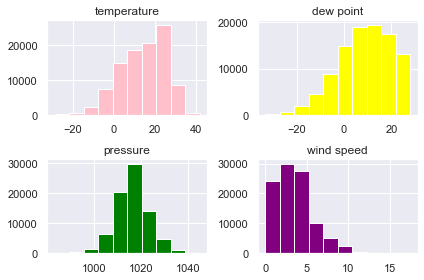

In [226]:
plt.subplot(2,2,1)
#temperature
plt.hist(weather['temperature'],color='pink')
plt.title('temperature')

plt.subplot(2,2,2)
#dew point
plt.hist(weather['dew_point'],color='yellow')
plt.title('dew point')

plt.subplot(2,2,3)
#pressure
plt.hist(weather['pressure'],color='green')
plt.title('pressure')

plt.subplot(2,2,4)
#wind speed
plt.hist(weather['wind_speed'],color='purple')
plt.title('wind speed')

plt.tight_layout()
plt.show()

### Conclusion:
temperature: skewed left \
dew point: skewed left \
pressure: normal distribution \
wind speed: skewed right

12. Draw a bar chart that shows average ``temperature`` for different months. Replace month number with month name and format month labels in a way that is readable by rotating them 30 degrees (20 points).

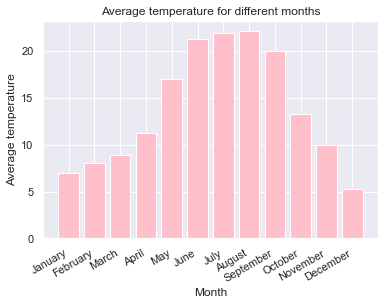

In [227]:
a=weather.groupby('month').aggregate({'temperature':'mean'}).rename(index={1.0:'January',
                                                                         2.0:'February',
                                                                         3.0:'March',
                                                                         4.0:'April',
                                                                         5.0:'May',
                                                                         6.0:'June',
                                                                         7.0:'July',
                                                                         8.0:'August',
                                                                         9.0:'September',
                                                                         10.0:'October',
                                                                         11.0:'November',
                                                                         12.0:'December'})
b=a.reset_index()
month=b['month']
temperature=b['temperature']
plt.bar(month,temperature,color='pink')
plt.title("Average temperature for different months")
plt.xticks(rotation=30,ha='right')
plt.xlabel("Month")
plt.ylabel("Average temperature")

plt.show()

13. Plot a line chart that shows average ``temperature`` over time. The x-axis should contain a label for every other year (15 points).

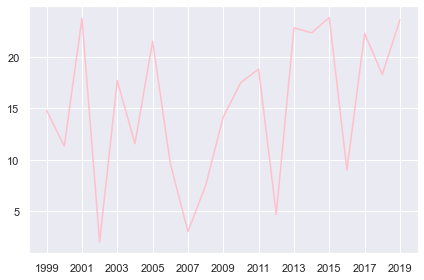

In [228]:
a=weather.groupby('year').aggregate({'temperature':'mean'}).reset_index()
x=a['year']
y=a['temperature']
plt.plot(x,y,color='pink')
plt.xticks(np.arange(min(x),max(x)+1,2.0))

plt.tight_layout()
plt.show()

14. Select the top 10 stations that have the most number of records. Draw a bar chat that shows the number of records for each of the 10 station (20 points).

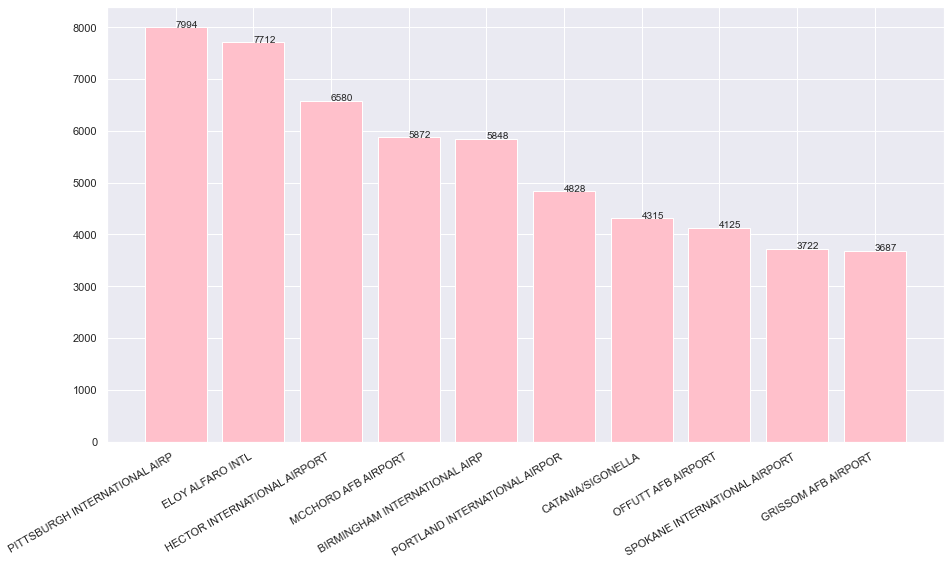

In [229]:
count_top10=(weather['STATION NAME'].value_counts()).head(10)
df=pd.DataFrame(count_top10).reset_index()
df.columns=['station name','number of records']
x=df['station name']
y=df['number of records']
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
f=plt.figure()
f.set_figwidth(15)
f.set_figheight(8)

plt.bar(x,y,color='pink')
addlabels(x,y)
plt.xticks(rotation=30,ha='right')

plt.show()




15. Add a new column named ``season`` which is calculated based on month. Use Jun-Aug for summer, Dec-Feb for winter and so on (15 points).

In [230]:
season={1.0:'winter',
        2.0:'winter',
        3.0:'spring',
        4.0:'spring',
        5.0:'spring',
        6.0:'summer',
        7.0:'summer',
        8.0:'summer',
        9.0:'fall',
        10.0:'fall',
        11.0:'fall',
        12.0:'winter'}
weather['season']=weather['month'].apply(lambda x: season[x])

In [231]:
weather['season'].value_counts()

summer    29858
fall      26701
winter    24120
spring    19321
Name: season, dtype: int64

16. For the top 10 stations calculated in previous steps, draw a bar chart that shows average ``temperature`` for each season for each station (15 points).

<Figure size 1080x576 with 0 Axes>

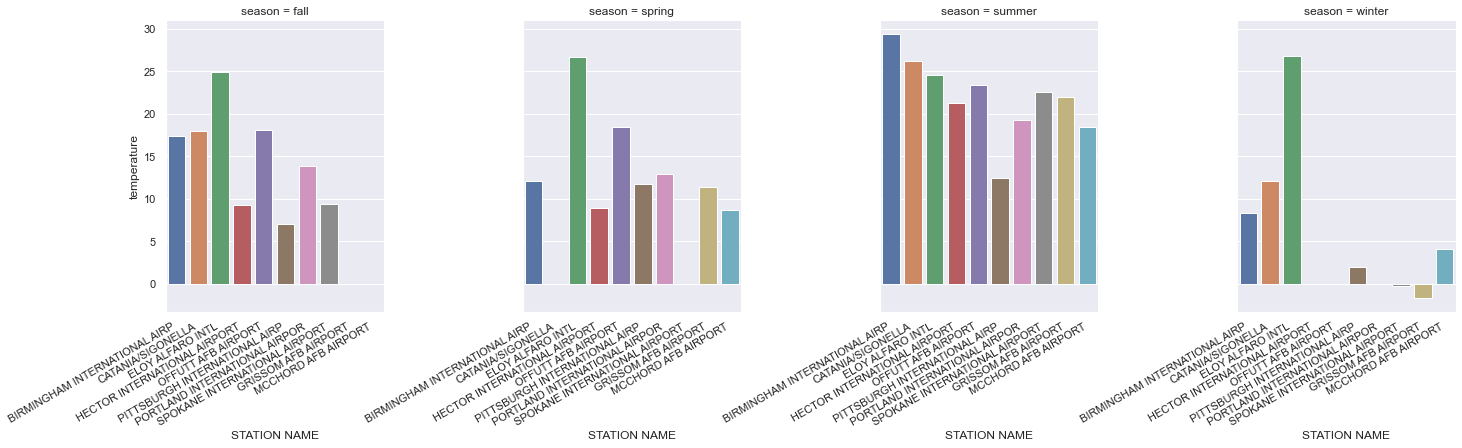

In [232]:
plt.figure(figsize=(15,8))

top10=df['station name']
a=weather.groupby(['season','STATION NAME']).aggregate({'temperature':'mean'}).reset_index()
b=a[a['STATION NAME'].isin(top10)]


c=sns.catplot(data=b,x='STATION NAME',y='temperature',col='season',kind='bar')
c.set_xticklabels(rotation=30,ha='right')

17. Draw a pair plot of all weather measures. Put season on color (10 points).

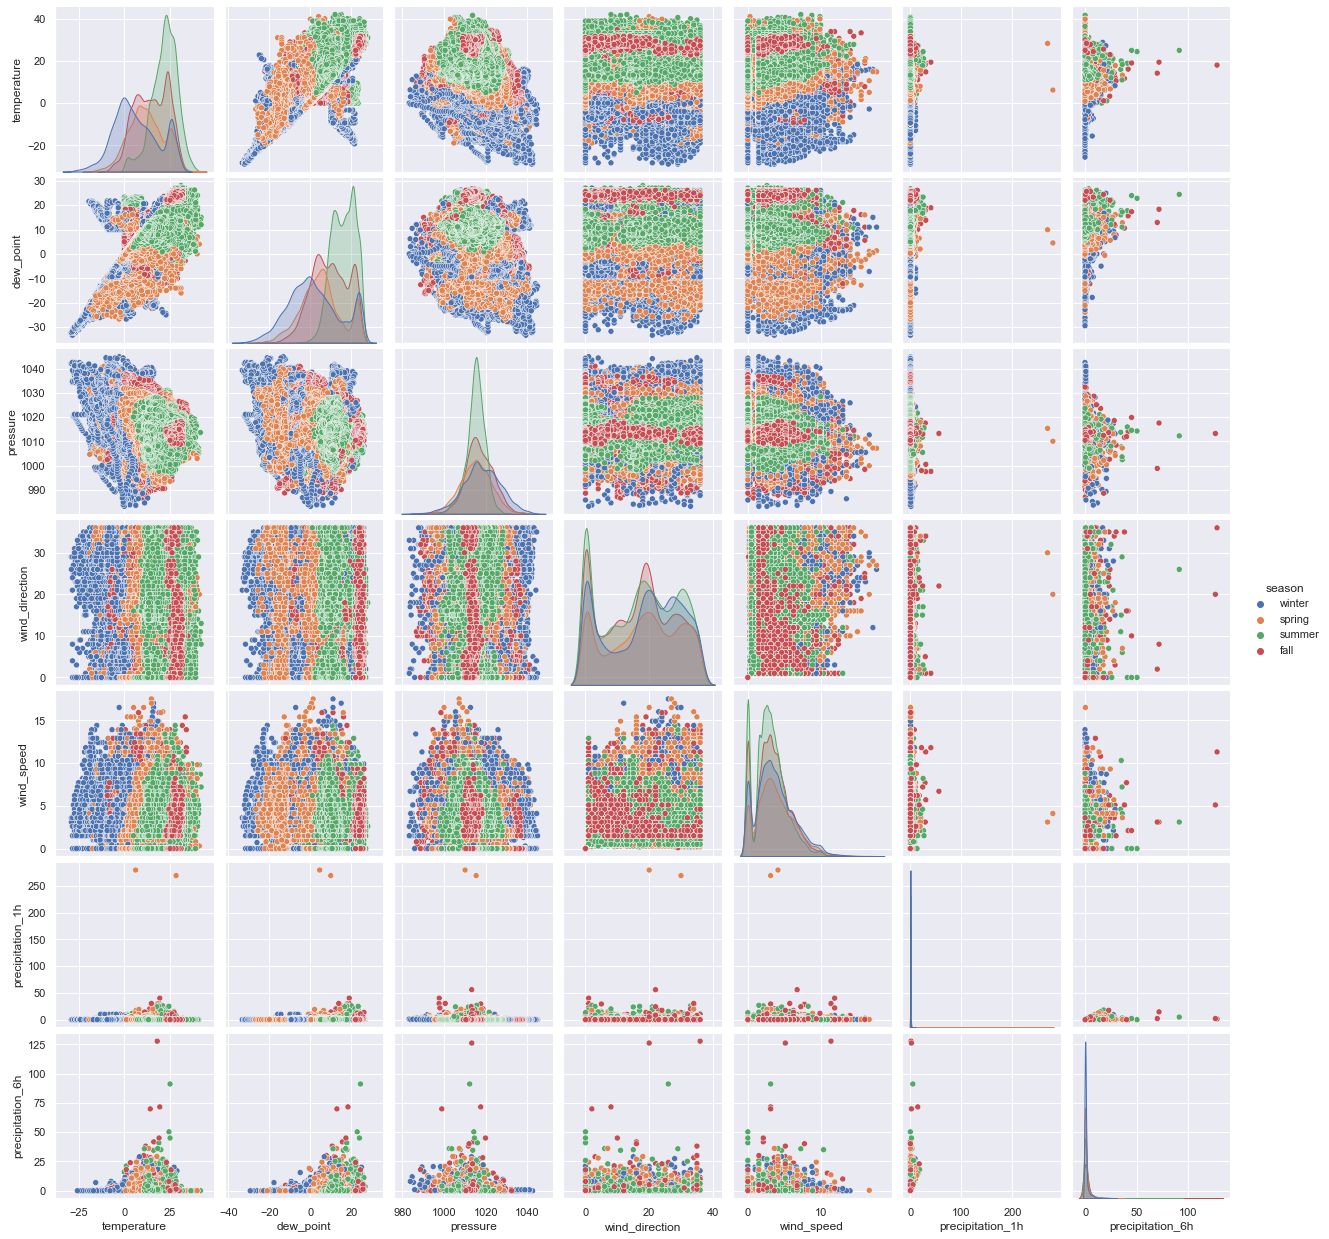

In [233]:
sns.pairplot(weather,vars=['temperature','dew_point','pressure','wind_direction','wind_speed',
             'precipitation_1h','precipitation_6h'],hue='season',height=2.5)

18. Based on what you see above, which columns contain outliers? (10 points)

### Conclusion:
Based on above, we can see these columns contain outliers:\
'temperature', 'dew_point', 'pressure', 'wind_speed', 'precipitation_1h', 'precipitation_6h'

19. Exclude all outliers and store the result in a new ``DataFrame`` named ``weather_no_outlier``. Make sure you don't end up with too few records by excluding missing values. Check the shape of your ``DataFrame`` after filtering to make sure you retained most of your data (15 points).

In [234]:
Q1=weather.quantile(0.25)
Q3=weather.quantile(0.75)
IQR=Q3-Q1

weather_no_outlier=weather[~((weather<(Q1-1.5*IQR))|(weather>(Q3+1.5*IQR))).any(axis=1)]

weather_no_outlier.shape

/var/folders/ft/nr64ylkn0lqb43gh8m5vvy3h0000gn/T/ipykernel_74656/1547288800.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  weather_no_outlier=weather[~((weather<(Q1-1.5*IQR))|(weather>(Q3+1.5*IQR))).any(axis=1)]


(84394, 17)

20. Rerun the pair plot to see how it changed after outlier removal (1 points).

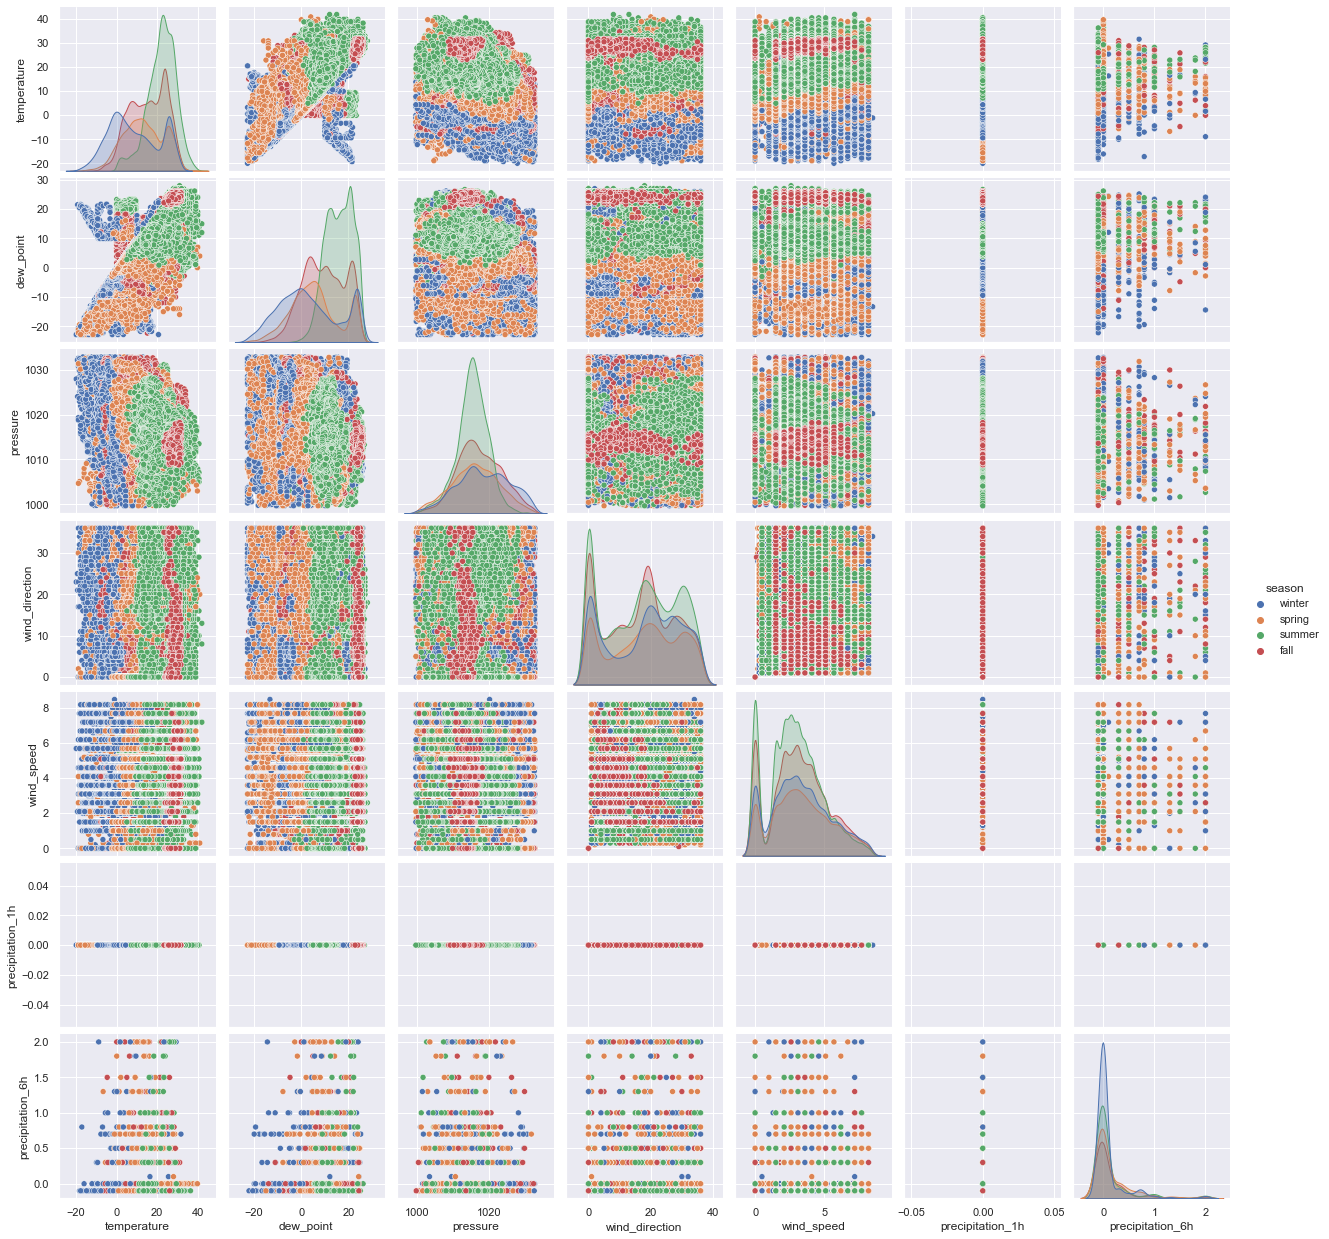

In [235]:
sns.pairplot(weather_no_outlier,vars=['temperature','dew_point','pressure','wind_direction','wind_speed',
             'precipitation_1h','precipitation_6h'],hue='season',height=2.5)

21. Do any two of these measures seem to be related? (10 points)

### Conclusion:
From the charts above, we also do corr() function to test two measures' relative.\
After multiple treat, we found 'temperature' and 'dew_point' has a strong positive correlation.

In [236]:
weather_no_outlier.corr()

,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h
year,1.000000,0.104225,-0.003966,0.002620,0.241586,0.241540,-0.091332,-0.005612,0.063187,-0.183054,NaN,0.182206
month,0.104225,1.000000,-0.001477,0.002847,0.046533,0.068850,0.069660,-0.055788,-0.009300,-0.034954,NaN,0.064281
day,-0.003966,-0.001477,1.000000,0.000428,0.032191,0.033529,-0.057575,0.005706,0.019804,0.008265,NaN,0.008450
hour,0.002620,0.002847,0.000428,1.000000,0.096749,0.005552,0.017529,0.063028,0.129489,0.060779,NaN,0.005086
temperature,0.241586,0.046533,0.032191,0.096749,1.000000,0.816442,-0.338240,0.017330,0.053950,0.030586,NaN,-0.007141
dew_point,0.241540,0.068850,0.033529,0.005552,0.816442,1.000000,-0.282912,-0.026681,-0.064614,0.159221,NaN,0.100742
pressure,-0.091332,0.069660,-0.057575,0.017529,-0.338240,-0.282912,1.000000,-0.115464,-0.198724,-0.077414,NaN,-0.134213
wind_direction,-0.005612,-0.055788,0.005706,0.063028,0.017330,-0.026681,-0.115464,1.000000,0.416678,0.063100,NaN,-0.013410
wind_speed,0.063187,-0.009300,0.019804,0.129489,0.053950,-0.064614,-0.198724,0.416678,1.000000,0.031488,NaN,-0.007469
sky_condition,-0.183054,-0.034954,0.008265,0.060779,0.030586,0.159221,-0.077414,0.063100,0.031488,1.000000,NaN,0.229974


22. Below write anything the catches your eye in the charts above (10 points).

### Conclusion:
From the charts above, we can see:\
1.Summer temperature higher than other three season.\
2.Summer dew point higher than other three season.\
3.Summer pressure higher than other three season.\
4.Four seasons no obviously different on wind direction.\
5.Summer a little higher than other three season on wind speed.\
6.Winter higher than other three season on precipititation_6h.\
7.temperature and dew point has a strong positive correlation, which means dew point increases with an increase in temperature.

23. Replace all missing values with the value from the previous record (15 points).

In [237]:
weather.fillna(method='ffill',inplace=True)
weather.isnull().sum()

station_wban           0
year                   0
month                  0
day                    0
hour                   0
temperature            0
dew_point              0
pressure               2
wind_direction         0
wind_speed             0
sky_condition          0
precipitation_1h    3856
precipitation_6h     117
STATION NAME           0
CTRY                   0
ST CALL                0
season                 0
dtype: int64

24. Replace the remaining missing values with the value from the next record (15 points).

In [238]:
weather.fillna(method='bfill',inplace=True)
weather.isnull().sum()

station_wban        0
year                0
month               0
day                 0
hour                0
temperature         0
dew_point           0
pressure            0
wind_direction      0
wind_speed          0
sky_condition       0
precipitation_1h    0
precipitation_6h    0
STATION NAME        0
CTRY                0
ST CALL             0
season              0
dtype: int64

25. Are there any missing values left? If yes, replace them with the mean of the station (10 points).

### Answer: 
There is no missing values

26. Create a new ``DataFrame`` named ``normalized_df`` that contains normalized values of all measures of ``weather`` ``DataFrame``. ``normalized_df`` must contain the same columns as ``weather`` but all weather measures are normalized (10 points).

In [239]:
from sklearn.preprocessing import StandardScaler
normalized_df=weather

sta=StandardScaler()
num=weather.select_dtypes(exclude=['object'])
normalized_df[num.columns]=sta.fit_transform(num)
normalized_df.shape

(100000, 17)

In [240]:
normalized_df.head()

,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h,STATION NAME,CTRY,ST CALL,season
0,841170-99999,0.11887,-1.695684,-0.098647,0.652052,1.135017,1.126024,-0.593457,1.123373,0.713112,0.881941,-0.042197,0.177754,ELOY ALFARO INTL,EC,SEMT,winter
1,841170-99999,0.11887,-1.695684,-0.098647,0.796432,1.135017,1.126024,-0.593457,1.211688,0.966931,0.881941,-0.042197,0.177754,ELOY ALFARO INTL,EC,SEMT,winter
2,841170-99999,0.11887,-1.695684,-0.098647,0.940813,1.189144,1.107634,-0.593457,1.211688,0.713112,0.881941,-0.042197,0.177754,ELOY ALFARO INTL,EC,SEMT,winter
3,841170-99999,0.11887,-1.695684,-0.098647,1.085193,1.225228,1.217975,-0.593457,1.300004,1.178447,0.881941,-0.042197,0.177754,ELOY ALFARO INTL,EC,SEMT,winter
4,841170-99999,0.11887,-1.695684,-0.098647,1.229573,1.225228,1.217975,-0.593457,1.123373,1.601478,0.881941,-0.042197,0.177754,ELOY ALFARO INTL,EC,SEMT,winter


27. In ``normalized_df``, convert all categorical varaibles, except for ``station_wban``, to dummies (10 points).

In [241]:
normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   station_wban      100000 non-null  object 
 1   year              100000 non-null  float64
 2   month             100000 non-null  float64
 3   day               100000 non-null  float64
 4   hour              100000 non-null  float64
 5   temperature       100000 non-null  float64
 6   dew_point         100000 non-null  float64
 7   pressure          100000 non-null  float64
 8   wind_direction    100000 non-null  float64
 9   wind_speed        100000 non-null  float64
 10  sky_condition     100000 non-null  float64
 11  precipitation_1h  100000 non-null  float64
 12  precipitation_6h  100000 non-null  float64
 13  STATION NAME      100000 non-null  object 
 14  CTRY              100000 non-null  object 
 15  ST CALL           100000 non-null  object 
 16  season            100

In [242]:
normalized_df=pd.get_dummies(normalized_df,columns=['STATION NAME','CTRY','ST CALL','season'])
normalized_df.columns

Index(['station_wban', 'year', 'month', 'day', 'hour', 'temperature',
       'dew_point', 'pressure', 'wind_direction', 'wind_speed',
       'sky_condition', 'precipitation_1h', 'precipitation_6h',
       'STATION NAME_BANGOR INTL',
       'STATION NAME_BIRMINGHAM INTERNATIONAL AIRP',
       'STATION NAME_BUCKLEY AIR FORCE BASE', 'STATION NAME_BURGAS',
       'STATION NAME_BURLINGTON INTERNATIONAL AIRP', 'STATION NAME_CAIRO INTL',
       'STATION NAME_CAMPBELL AAF AIRPORT', 'STATION NAME_CATANIA/SIGONELLA',
       'STATION NAME_CITY OF COLORADO SPRINGS MUNI',
       'STATION NAME_DAVIS MONTHAN AFB',
       'STATION NAME_DES MOINES INTERNATIONAL AIRP',
       'STATION NAME_ELLINGTON FIELD AIRPORT', 'STATION NAME_ELOY ALFARO INTL',
       'STATION NAME_FORBES FLD', 'STATION NAME_GRISSOM AFB AIRPORT',
       'STATION NAME_HECTOR INTERNATIONAL AIRPORT',
       'STATION NAME_HILO INTERNATIONAL AIRPORT',
       'STATION NAME_HONOLULU INTERNATIONAL AIRPOR',
       'STATION NAME_LANGLEY AFB AI

28. Check the head of ``normalized_df`` (5 points).

In [243]:
normalized_df.head()

,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,...,ST CALL_VA KRIC,ST CALL_VT KBTV,ST CALL_WA KGEG,ST CALL_WA KTCM,ST CALL_WSAP,ST CALL_WSSS,season_fall,season_spring,season_summer,season_winter
0,841170-99999,0.11887,-1.695684,-0.098647,0.652052,1.135017,1.126024,-0.593457,1.123373,0.713112,...,0,0,0,0,0,0,0,0,0,1
1,841170-99999,0.11887,-1.695684,-0.098647,0.796432,1.135017,1.126024,-0.593457,1.211688,0.966931,...,0,0,0,0,0,0,0,0,0,1
2,841170-99999,0.11887,-1.695684,-0.098647,0.940813,1.189144,1.107634,-0.593457,1.211688,0.713112,...,0,0,0,0,0,0,0,0,0,1
3,841170-99999,0.11887,-1.695684,-0.098647,1.085193,1.225228,1.217975,-0.593457,1.300004,1.178447,...,0,0,0,0,0,0,0,0,0,1
4,841170-99999,0.11887,-1.695684,-0.098647,1.229573,1.225228,1.217975,-0.593457,1.123373,1.601478,...,0,0,0,0,0,0,0,0,0,1
